# Counting people

In [91]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as pl
import cvxopt
from cvxopt import matrix
from cvxopt import solvers
from skimage import data,color

count_data_trainx = np.loadtxt('count_data_trainx.txt') 
count_data_trainy = np.loadtxt('count_data_trainy.txt') 
count_data_testx = np.loadtxt('count_data_testx.txt') 
count_data_testy = np.loadtxt('count_data_testy.txt') 

#5th orders
K = 5
def PHI(K,data):
    phi = []
    for i in range(0, K + 1):
        phi_inter = data ** i
        phi.append(phi_inter)
    phi = np.mat(phi)
    return phi

def plots(ploy_x,ploy_y,predict,label='name'):
    pl.plot(ploy_x,predict,'bo',label = label + '-predictions')
    pl.plot(ploy_x,ploy_y,'ro',label='true counts')
    pl.title(label)
    pl.legend() 
    pl.savefig(label + "-predictions.jpg")
    pl.close()
    return
def plots_BR(ploy_x,ploy_y,predict):
    pl.plot(ploy_x,predict[0],'bo',label='BR-predictions')
    pl.plot(ploy_x,ploy_y,'ro',label='true counts')
    #pl.errorbar(ploy_x,ploy_y,np.sqrt(np.diag(predict[1])),label='True function')
    pl.title('BR')
    pl.legend()
    pl.savefig("BR-predictions.jpg")
    pl.show()
    
def MAE(trueoutput, learnedoutput):
    trueoutput = trueoutput.reshape(len(trueoutput),1)
    learnedoutput = learnedoutput.reshape(len(learnedoutput),1)
    return np.sum(np.fabs(trueoutput-learnedoutput))/np.size(trueoutput)
    
def MSE(trueoutput, learnedoutput):
    trueoutput = trueoutput.reshape(len(trueoutput),1)
    learnedoutput = learnedoutput.reshape(len(learnedoutput),1)
    return np.sum(np.square(trueoutput-learnedoutput))/np.size(trueoutput)

# A

     pcost       dcost       gap    pres   dres
 0: -1.7234e+04 -1.7061e+04  6e+02  3e+01  2e-03
 1: -1.7143e+04 -1.7208e+04  7e+01  3e-01  1e-05
 2: -1.7196e+04 -1.7202e+04  6e+00  2e-02  1e-06
 3: -1.7198e+04 -1.7199e+04  8e-01  3e-03  1e-07
 4: -1.7198e+04 -1.7198e+04  1e-02  2e-05  8e-10
 5: -1.7198e+04 -1.7198e+04  1e-04  2e-07  8e-12
 6: -1.7198e+04 -1.7198e+04  1e-06  2e-09  8e-14
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.6645e-14  2e+03  6e-01  1e-15  1e+00
 1:  1.7856e+02  1.7869e+02  4e+02  1e-01  2e-14  3e-01
 2:  3.3102e+02  3.3105e+02  9e+01  2e-02  3e-14  8e-02
 3:  3.6933e+02  3.6934e+02  2e+01  6e-03  3e-14  2e-02
 4:  3.7769e+02  3.7769e+02  6e+00  2e-03  5e-14  6e-03
 5:  3.7998e+02  3.7998e+02  2e+00  4e-04  3e-13  2e-03
 6:  3.8069e+02  3.8069e+02  3e-01  8e-05  4e-14  3e-04
 7:  3.8080e+02  3.8080e+02  6e-02  2e-05  1e-13  6e-05
 8:  3.8083e+02  3.8083e+02  1e-02  3e-06  3e-12  2e-05
 9:  3.8083e+02  3.8083e+02

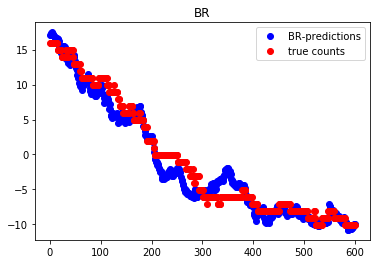

2.91858633883
1.32285681406


In [65]:
count_data_trainx = np.mat(count_data_trainx)
ls = poly_LS(count_data_trainx,count_data_trainy)
ls_predict = np.transpose(count_data_testx) * ls

rls = poly_RLS(count_data_trainx,count_data_trainy,1)
rls_predict = np.transpose(count_data_testx) * rls

lasso = poly_LASSO(count_data_trainx,count_data_trainy,1)
lasso_predict = np.dot(np.transpose(count_data_testx),lasso)

rr = poly_RR(count_data_trainx,count_data_trainy)
rr_predict = np.dot(np.transpose(count_data_testx),rr)

post = posterior(count_data_trainy, count_data_trainx, 0.1, 0.1)
br = poly_BR(count_data_testx,post[0],post[1],K)



plots(np.arange(np.size(count_data_testy)) + 1,count_data_testy,ls_predict,'LS')
print(MSE(count_data_testy,ls_predict))
print(MAE(count_data_testy,ls_predict))
print('*****************************************************************************')
plots(np.arange(np.size(count_data_testy)) + 1,count_data_testy,rls_predict,'RLS')
print(MSE(count_data_testy,rls_predict))
print(MAE(count_data_testy,rls_predict))
print('*****************************************************************************')
plots(np.arange(np.size(count_data_testy)) + 1,count_data_testy,lasso_predict,'LASSO')
print(MSE(count_data_testy,lasso_predict))
print(MAE(count_data_testy,lasso_predict))
print('*****************************************************************************')
plots(np.arange(np.size(count_data_testy)) + 1,count_data_testy,rr_predict,'RR')
print(MSE(count_data_testy,rr_predict))
print(MAE(count_data_testy,rr_predict))
print('*****************************************************************************')
plots_BR(np.arange(np.size(count_data_testy)) + 1,count_data_testy,br)
print(MSE(count_data_testy,br[0]))
print(MAE(count_data_testy,br[0]))

# B feature transformation 

In [92]:
def PHI1(data):
    return np.vstack((data,np.multiply(data,data)))

def PHI2(data):
    return np.vstack((PHI1(data),np.multiply(np.multiply(data,data),data)))

def PHI3(data):
    return np.vstack((PHI1(data),np.multiply(data[3,:],data[8,:])))

def PHI4(data):
    return np.vstack((PHI2(data),np.multiply(data[1,:],data[3,:])))

In [94]:
# PHI1
phicount_data_trainx = PHI1(count_data_trainx)
phicount_data_testx = (PHI1(count_data_testx)
phicount_data_trainx = np.mat(phicount_data_trainx)
ls = poly_LS(phicount_data_trainx,count_data_trainy)
ls_predict = np.transpose(phicount_data_testx) * ls

rls = poly_RLS(phicount_data_trainx,count_data_trainy,1)
rls_predict = np.transpose(phicount_data_testx) * rls

lasso = poly_LASSO(phicount_data_trainx,count_data_trainy,1)
lasso_predict = np.dot(np.transpose(phicount_data_testx),lasso)

rr = poly_RR(phicount_data_trainx,count_data_trainy)
rr_predict = np.dot(np.transpose(phicount_data_testx),rr)

post = posterior(count_data_trainy, phicount_data_trainx, 0.1, 0.1)
br = poly_BR(phicount_data_testx,post[0],post[1],K)

print(MSE(count_data_testy,ls_predict))
print(MAE(count_data_testy,ls_predict))
print('*****************************************************************************')
print(MSE(count_data_testy,rls_predict))
print(MAE(count_data_testy,rls_predict))
print('*****************************************************************************')
print(MSE(count_data_testy,lasso_predict))
print(MAE(count_data_testy,lasso_predict))
print('*****************************************************************************')
print(MSE(count_data_testy,rr_predict))
print(MAE(count_data_testy,rr_predict))
print('*****************************************************************************')
print(MSE(count_data_testy,br[0]))
print(MAE(count_data_testy,br[0]))

     pcost       dcost       gap    pres   dres
 0: -1.7292e+04 -1.6994e+04  1e+03  4e+01  2e-03
 1: -1.7106e+04 -1.7274e+04  2e+02  1e+00  7e-05
 2: -1.7231e+04 -1.7246e+04  2e+01  1e-01  6e-06
 3: -1.7238e+04 -1.7240e+04  2e+00  1e-02  7e-07
 4: -1.7239e+04 -1.7239e+04  2e-01  1e-03  5e-08
 5: -1.7239e+04 -1.7239e+04  7e-03  7e-06  3e-10
 6: -1.7239e+04 -1.7239e+04  2e-04  8e-08  4e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.6645e-14  2e+03  5e-01  2e-14  1e+00
 1:  1.9207e+02  1.9216e+02  3e+02  8e-02  3e-14  3e-01
 2:  3.1483e+02  3.1486e+02  8e+01  2e-02  5e-14  7e-02
 3:  3.4722e+02  3.4723e+02  2e+01  5e-03  7e-14  2e-02
 4:  3.5429e+02  3.5430e+02  6e+00  2e-03  2e-13  6e-03
 5:  3.5652e+02  3.5652e+02  2e+00  7e-04  4e-13  3e-03
 6:  3.5727e+02  3.5727e+02  1e+00  3e-04  5e-13  1e-03
 7:  3.5771e+02  3.5771e+02  2e-01  5e-05  2e-12  2e-04
 8:  3.5778e+02  3.5778e+02  6e-02  2e-05  1e-11  7e-05
 9:  3.5780e+02  3.5780e+02

In [95]:
# PHI2
phicount_data_trainx = PHI2(count_data_trainx)
phicount_data_testx = PHI2(count_data_testx)
phicount_data_trainx = np.mat(phicount_data_trainx)
ls = poly_LS(phicount_data_trainx,count_data_trainy)
ls_predict = np.transpose(phicount_data_testx) * ls

rls = poly_RLS(phicount_data_trainx,count_data_trainy,1)
rls_predict = np.transpose(phicount_data_testx) * rls

lasso = poly_LASSO(phicount_data_trainx,count_data_trainy,1)
lasso_predict = np.dot(np.transpose(phicount_data_testx),lasso)

rr = poly_RR(phicount_data_trainx,count_data_trainy)
rr_predict = np.dot(np.transpose(phicount_data_testx),rr)

post = posterior(count_data_trainy, phicount_data_trainx, 0.1, 0.1)
br = poly_BR(phicount_data_testx,post[0],post[1],K)

print(MSE(count_data_testy,ls_predict))
print(MAE(count_data_testy,ls_predict))
print('*****************************************************************************')
print(MSE(count_data_testy,rls_predict))
print(MAE(count_data_testy,rls_predict))
print('*****************************************************************************')
print(MSE(count_data_testy,lasso_predict))
print(MAE(count_data_testy,lasso_predict))
print('*****************************************************************************')
print(MSE(count_data_testy,rr_predict))
print(MAE(count_data_testy,rr_predict))
print('*****************************************************************************')
print(MSE(count_data_testy,br[0]))
print(MAE(count_data_testy,br[0]))

     pcost       dcost       gap    pres   dres
 0: -1.7349e+04 -1.6947e+04  2e+03  5e+01  1e-03
 1: -1.7070e+04 -1.7344e+04  3e+02  2e+00  6e-05
 2: -1.7263e+04 -1.7287e+04  2e+01  2e-01  4e-06
 3: -1.7278e+04 -1.7282e+04  4e+00  2e-02  5e-07
 4: -1.7280e+04 -1.7280e+04  6e-01  2e-03  6e-08
 5: -1.7280e+04 -1.7280e+04  5e-02  1e-04  3e-09
 6: -1.7280e+04 -1.7280e+04  1e-03  9e-08  2e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.6645e-14  2e+03  4e-01  2e-14  1e+00
 1:  1.8285e+02  1.8291e+02  3e+02  7e-02  2e-14  2e-01
 2:  2.8445e+02  2.8447e+02  8e+01  2e-02  7e-14  8e-02
 3:  3.1139e+02  3.1140e+02  3e+01  8e-03  3e-13  3e-02
 4:  3.2184e+02  3.2184e+02  1e+01  3e-03  5e-13  1e-02
 5:  3.2472e+02  3.2473e+02  4e+00  1e-03  4e-13  4e-03
 6:  3.2574e+02  3.2574e+02  2e+00  5e-04  2e-12  2e-03
 7:  3.2649e+02  3.2649e+02  3e-01  9e-05  2e-12  4e-04
 8:  3.2659e+02  3.2659e+02  1e-01  3e-05  2e-12  2e-04
 9:  3.2664e+02  3.2664e+02

In [96]:
# PHI3
phicount_data_trainx = PHI3(count_data_trainx)
phicount_data_testx = PHI3(count_data_testx)
phicount_data_trainx = np.mat(phicount_data_trainx)
ls = poly_LS(phicount_data_trainx,count_data_trainy)
ls_predict = np.transpose(phicount_data_testx) * ls

rls = poly_RLS(phicount_data_trainx,count_data_trainy,1)
rls_predict = np.transpose(phicount_data_testx) * rls

lasso = poly_LASSO(phicount_data_trainx,count_data_trainy,1)
lasso_predict = np.dot(np.transpose(phicount_data_testx),lasso)

rr = poly_RR(phicount_data_trainx,count_data_trainy)
rr_predict = np.dot(np.transpose(phicount_data_testx),rr)

post = posterior(count_data_trainy, phicount_data_trainx, 0.1, 0.1)
br = poly_BR(phicount_data_testx,post[0],post[1],K)

print(MSE(count_data_testy,ls_predict))
print(MAE(count_data_testy,ls_predict))
print('*****************************************************************************')
print(MSE(count_data_testy,rls_predict))
print(MAE(count_data_testy,rls_predict))
print('*****************************************************************************')
print(MSE(count_data_testy,lasso_predict))
print(MAE(count_data_testy,lasso_predict))
print('*****************************************************************************')
print(MSE(count_data_testy,rr_predict))
print(MAE(count_data_testy,rr_predict))
print('*****************************************************************************')
print(MSE(count_data_testy,br[0]))
print(MAE(count_data_testy,br[0]))

     pcost       dcost       gap    pres   dres
 0: -1.7308e+04 -1.6981e+04  2e+03  5e+01  2e-03
 1: -1.7108e+04 -1.7302e+04  2e+02  2e+00  1e-04
 2: -1.7244e+04 -1.7261e+04  2e+01  1e-01  7e-06
 3: -1.7253e+04 -1.7256e+04  3e+00  2e-02  8e-07
 4: -1.7254e+04 -1.7254e+04  2e-01  9e-04  5e-08
 5: -1.7254e+04 -1.7254e+04  6e-03  1e-15  3e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.6645e-14  2e+03  4e-01  2e-14  1e+00
 1:  1.8727e+02  1.8734e+02  3e+02  7e-02  3e-14  2e-01
 2:  3.0661e+02  3.0663e+02  6e+01  2e-02  5e-14  6e-02
 3:  3.2590e+02  3.2591e+02  3e+01  7e-03  1e-13  3e-02
 4:  3.3487e+02  3.3488e+02  1e+01  3e-03  1e-13  1e-02
 5:  3.3922e+02  3.3922e+02  3e+00  7e-04  9e-14  3e-03
 6:  3.4025e+02  3.4025e+02  6e-01  1e-04  1e-13  6e-04
 7:  3.4046e+02  3.4046e+02  1e-01  4e-05  6e-13  2e-04
 8:  3.4051e+02  3.4051e+02  5e-02  1e-05  2e-12  6e-05
 9:  3.4053e+02  3.4053e+02  3e-03  7e-07  3e-12  3e-06
10:  3.4053e+02  3.4

In [97]:
# PHI4
phicount_data_trainx = PHI4(count_data_trainx)
phicount_data_testx = PHI4(count_data_testx)
phicount_data_trainx = np.mat(phicount_data_trainx)
ls = poly_LS(phicount_data_trainx,count_data_trainy)
ls_predict = np.transpose(phicount_data_testx) * ls

rls = poly_RLS(phicount_data_trainx,count_data_trainy,1)
rls_predict = np.transpose(phicount_data_testx) * rls

lasso = poly_LASSO(phicount_data_trainx,count_data_trainy,1)
lasso_predict = np.dot(np.transpose(phicount_data_testx),lasso)

rr = poly_RR(phicount_data_trainx,count_data_trainy)
rr_predict = np.dot(np.transpose(phicount_data_testx),rr)

post = posterior(count_data_trainy, phicount_data_trainx, 0.1, 0.1)
br = poly_BR(phicount_data_testx,post[0],post[1],K)

print(MSE(count_data_testy,ls_predict))
print(MAE(count_data_testy,ls_predict))
print('*****************************************************************************')
print(MSE(count_data_testy,rls_predict))
print(MAE(count_data_testy,rls_predict))
print('*****************************************************************************')
print(MSE(count_data_testy,lasso_predict))
print(MAE(count_data_testy,lasso_predict))
print('*****************************************************************************')
print(MSE(count_data_testy,rr_predict))
print(MAE(count_data_testy,rr_predict))
print('*****************************************************************************')
print(MSE(count_data_testy,br[0]))
print(MAE(count_data_testy,br[0]))

     pcost       dcost       gap    pres   dres
 0: -1.7358e+04 -1.6936e+04  2e+03  6e+01  1e-03
 1: -1.7065e+04 -1.7355e+04  3e+02  3e+00  6e-05
 2: -1.7268e+04 -1.7294e+04  3e+01  2e-01  4e-06
 3: -1.7283e+04 -1.7287e+04  4e+00  2e-02  5e-07
 4: -1.7285e+04 -1.7285e+04  6e-01  2e-03  5e-08
 5: -1.7285e+04 -1.7285e+04  4e-02  8e-05  2e-09
 6: -1.7285e+04 -1.7285e+04  4e-04  8e-07  2e-11
 7: -1.7285e+04 -1.7285e+04  4e-06  8e-09  2e-13
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.6645e-14  2e+03  4e-01  2e-14  1e+00
 1:  1.7841e+02  1.7847e+02  3e+02  7e-02  6e-14  2e-01
 2:  2.8112e+02  2.8114e+02  7e+01  2e-02  1e-13  6e-02
 3:  3.0467e+02  3.0468e+02  2e+01  6e-03  2e-13  2e-02
 4:  3.1168e+02  3.1169e+02  1e+01  3e-03  3e-13  1e-02
 5:  3.1556e+02  3.1556e+02  3e+00  8e-04  2e-13  3e-03
 6:  3.1661e+02  3.1661e+02  1e+00  3e-04  1e-12  1e-03
 7:  3.1693e+02  3.1693e+02  3e-01  8e-05  1e-12  4e-04
 8:  3.1704e+02  3.1704e+02  6e-02

# Least square

In [20]:
#LS
def poly_LS(phi,y):
    return (phi * np.transpose(phi)).I * phi * np.transpose(np.mat(y))

# Regularized LS

In [21]:
#RLS
def poly_RLS(phi,y,Labmda):
    return ((phi * np.transpose(phi) + Labmda * np.eye(np.shape(phi)[0])).I) * phi * np.transpose(np.mat(y))

# LASSO

In [22]:
#LASSO
def poly_LASSO(phi,y,Lambda):
    phiphiT = phi * np.transpose(phi)
    H = np.vstack(((np.hstack((phiphiT,-1 * phiphiT))),
              (np.hstack((-1 * phiphiT, phiphiT)))))    
    phiy = np.vstack((phi * np.transpose(np.mat(y)),-1 * phi * np.transpose(np.mat(y))))
    f = Lambda * np.ones(phiy.shape) - phiy
    G = np.eye(len(f))*-1
    h = np.zeros(len(f))
    sol = solvers.qp(matrix(H),matrix(f),matrix(G),matrix(h))
    x = sol['x']
    theta = x[:int(len(x)/2)]- x[int(len(x)/2):]
    return theta

# RR

In [23]:
#RR
def poly_RR(phi,y):
    A = np.vstack(((np.hstack((-1 * np.transpose(phi),-1*np.eye(np.shape(np.transpose(phi))[0])))),
              (np.hstack((np.transpose(phi), -1*np.eye(np.shape(np.transpose(phi))[0]))))))  
    b = np.hstack((-y,y))
    f = np.hstack((np.zeros(np.shape(np.transpose(phi))[1]),np.ones(np.shape(np.transpose(phi))[0])))
    sol = solvers.lp(matrix(f),matrix(A),matrix(b))
    theta = np.array(sol['x'][:np.shape(np.transpose(phi))[1]])   
    return theta

# Bayesian regression

In [34]:
#Bayesian regression
def posterior(y,phi,alpha,sigma):
    thelta_cov = (1/alpha * np.eye(np.shape(phi)[0]) + 1/(sigma ** 2) * phi * np.transpose(phi)).I
    thelta_mean = 1/(sigma ** 2) * thelta_cov * phi * np.transpose(np.mat(y))
    return thelta_mean,thelta_cov
def poly_BR(x,thelta_mean,thelta_cov,K):
    thelta_mean_star = np.transpose(x) * thelta_mean
    thelta_cov_star = np.transpose(x) * thelta_cov * thelta_cov * x
    return thelta_mean_star,thelta_cov_star